In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/huy-video/huy.mp4
/kaggle/input/reid-test/WIN_20250211_20_01_01_Pro.mp4


In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.9/914.9 kB 17.1 MB/s eta 0:00:00a 0:00:01


In [6]:
from ultralytics import YOLO

model = YOLO('yolov9c.pt')

100%|██████████| 49.4M/49.4M [00:00<00:00, 124MB/s] 


In [3]:
import requests
import torch
from ultralytics import YOLO
from IPython.display import display
from PIL import Image

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


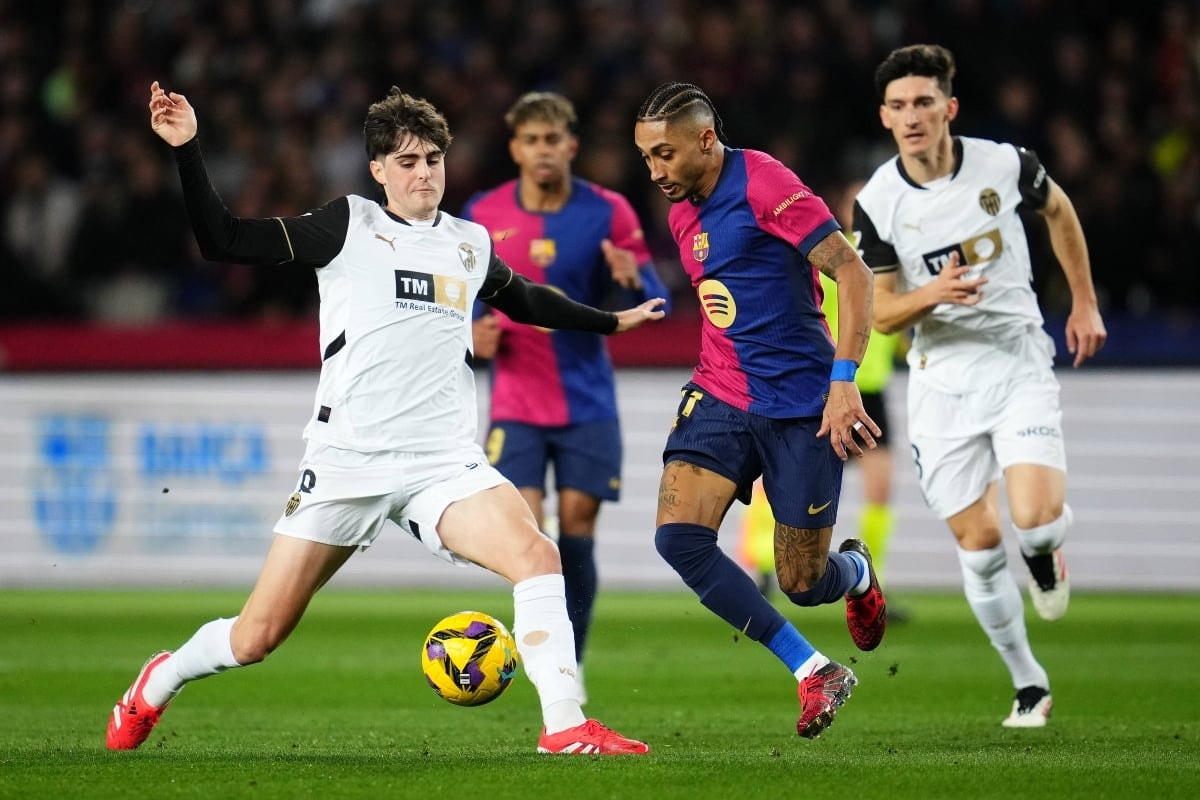

In [4]:
# Địa chỉ ảnh cần dự đoán
image_url = "https://bna.1cdn.vn/2025/01/28/footballwhispers.com-app-uploads-2025-01-_barcelona-vs-atalanta-predictions.jpg"
image_path = "barca.jpg"

# Tải ảnh về
response = requests.get(image_url)
with open(image_path, "wb") as file:
    file.write(response.content)

# Hiển thị ảnh trước khi nhận diện
display(Image.open(image_path))


image 1/1 /kaggle/working/barca.jpg: 448x640 5 persons, 1 sports ball, 51.0ms
Speed: 10.5ms preprocess, 51.0ms inference, 272.8ms postprocess per image at shape (1, 3, 448, 640)


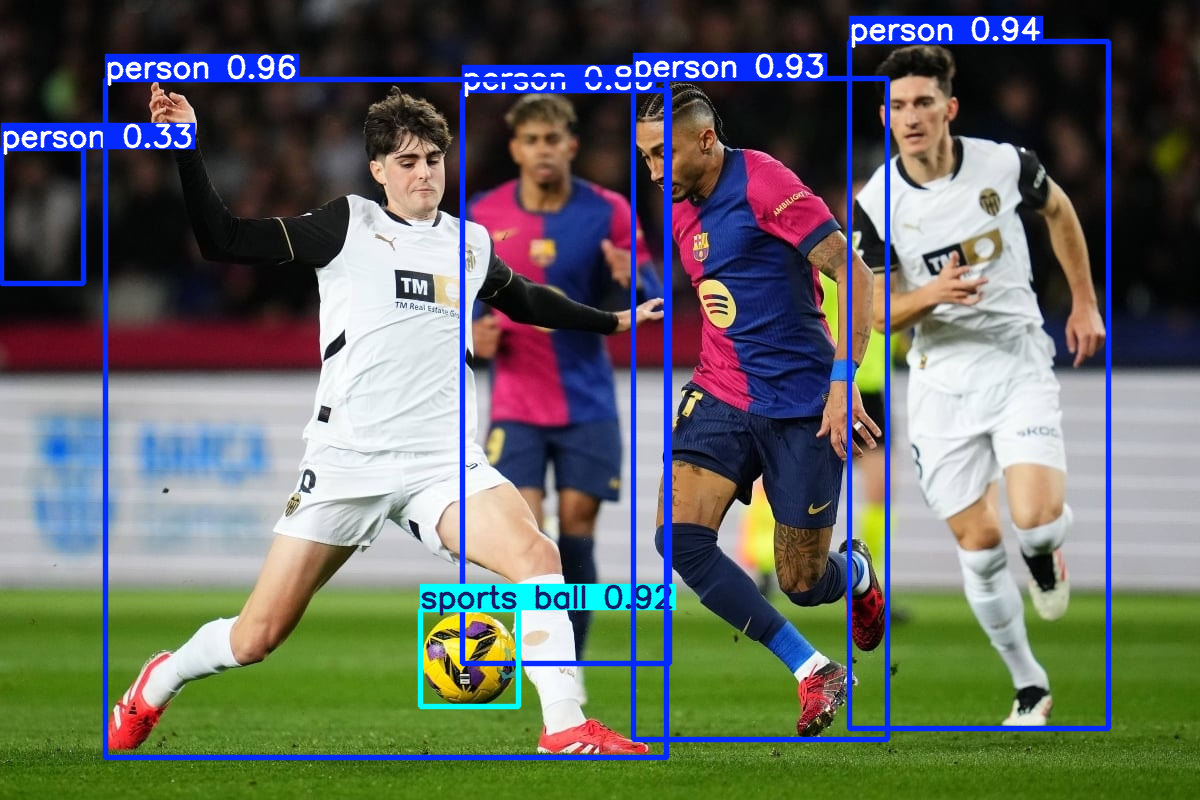

In [7]:
results = model(image_path)  # Dự đoán trên ảnh

# Hiển thị kết quả
results[0].show()

In [8]:
!pip install yt-dlp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.0/172.0 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 61.6 MB/s eta 0:00:00:00:01


Down video về theo link.

In [9]:
!yt-dlp -f best -o "video2.mp4" "https://www.youtube.com/watch?v=ORrrKXGx2SE"

         To let yt-dlp download and merge the best available formats, simply do not pass any format selection.
         If you know what you are doing and want only the best pre-merged format, use "-f b" instead to suppress this warning
[youtube] Extracting URL: https://www.youtube.com/watch?v=ORrrKXGx2SE
[youtube] ORrrKXGx2SE: Downloading webpage
[youtube] ORrrKXGx2SE: Downloading tv client config
[youtube] ORrrKXGx2SE: Downloading player e7567ecf
[youtube] ORrrKXGx2SE: Downloading tv player API JSON
[youtube] ORrrKXGx2SE: Downloading ios player API JSON
[youtube] ORrrKXGx2SE: Downloading m3u8 information
[info] ORrrKXGx2SE: Downloading 1 format(s): 18
[download] Destination: video2.mp4
[download] 100% of  738.40KiB in 00:00:00 at 1.81MiB/s0;33m00:000m


In [12]:
results = model.track('/kaggle/working/video2.mp4', save=True)



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/341) /kaggle/working/video2.mp4: 384x640 29 persons, 1 handbag, 59.0ms
video 1/1 (frame 2/341) /kaggle/working/video2.mp4: 384x640 29 persons, 1 handbag, 31.5ms
video 1/1 (frame 3/341) /kaggle/working/video2.mp4: 384x640 27 persons, 1 handbag, 31.4ms
video 1/1 (frame 4/341) /kaggle/working/video2.mp4: 384x640 27 persons, 1 handbag, 31.4ms
video 1/1 (frame 5/341) /kaggle/working/video2.mp4: 384x640 27 persons, 1 handbag, 31.4ms
video 

In [5]:
!ls -lh /kaggle/working/

total 50M
drwxr-xr-x 3 root root 4.0K Feb 11 13:05 runs
-rw-r--r-- 1 root root  50M Feb 11 13:05 yolov9c.pt


In [6]:
!ls -lh /kaggle/working/runs/detect/predict

ls: cannot access '/kaggle/working/runs/detect/predict': No such file or directory


Chuyển từ file avi sang mp4 và lưu ở output/kaggle/working.

In [16]:
!ffmpeg -i /kaggle/working/runs/detect/predict/video2.avi -c:v libx264 -preset fast -crf 23 -c:a aac -b:a 128k pepple_walking.mp4

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab